In [1]:
import PySaRLAC as sl
import random
import math
import numpy as np
random.seed(1234)

In [2]:
Lt=32
f = sl.FitMulti()
f.addFitFunc(sl.FitConstant(),[0])
f.addFitFunc(sl.FitCosh(Lt),[0,1])
f.nparam()

2

In [3]:
N=400
raw = sl.CorrelationFunction(2*Lt)
for t in range(Lt):
    idx=2*t
    raw.setCoord(idx, (0,float(t)) )
    raw.setValue(idx, sl.RawDataDistribution(N))
    raw.value(idx).randomGaussian(3.14,1.)

    idx+=1
    raw.setCoord(idx, (1,float(t)) )

    d = sl.RawDataDistribution(N)
    d.randomGaussian(3.14,1.)
    
    d *= ( math.exp(-0.4*t) + math.exp(-0.4*(Lt-t) ) )
    
    raw.setValue(idx, d)
    
print(raw)
    
    

(0, 0.0) : 3.180926 +- 0.050999
(1, 0.0) : 3.173786 +- 0.049165
(0, 1.0) : 3.162285 +- 0.049128
(1, 1.0) : 2.143414 +- 0.033339
(0, 2.0) : 3.045013 +- 0.052646
(1, 2.0) : 1.386843 +- 0.022635
(0, 3.0) : 3.104517 +- 0.051818
(1, 3.0) : 0.972919 +- 0.014821
(0, 4.0) : 3.079007 +- 0.051439
(1, 4.0) : 0.624953 +- 0.010488
(0, 5.0) : 3.145534 +- 0.049010
(1, 5.0) : 0.432652 +- 0.006870
(0, 6.0) : 3.197783 +- 0.051583
(1, 6.0) : 0.286952 +- 0.004588
(0, 7.0) : 3.074494 +- 0.050564
(1, 7.0) : 0.192722 +- 0.002985
(0, 8.0) : 3.173411 +- 0.052579
(1, 8.0) : 0.128325 +- 0.002101
(0, 9.0) : 3.176482 +- 0.047004
(1, 9.0) : 0.086525 +- 0.001320
(0, 10.0) : 3.038590 +- 0.050716
(1, 10.0) : 0.056460 +- 0.000874
(0, 11.0) : 3.152706 +- 0.050694
(1, 11.0) : 0.039557 +- 0.000612
(0, 12.0) : 3.215935 +- 0.048983
(1, 12.0) : 0.026389 +- 0.000417
(0, 13.0) : 3.163414 +- 0.051081
(1, 13.0) : 0.018714 +- 0.000299
(0, 14.0) : 3.124113 +- 0.048433
(1, 14.0) : 0.014082 +- 0.000230
(0, 15.0) : 3.137939 +- 0.0505

In [4]:
jack = raw.resample(sl.JackknifeDistribution)
djack = raw.resample(sl.DoubleJackknifeDistribution)


In [5]:
fit_start = 4
fit_end = 16
cond = lambda c : True if c[1] >= fit_start and c[1] <= fit_end else False
jack_inrange = jack.subset(cond)
djack_inrange = djack.subset(cond)


In [6]:
print(jack_inrange)

(0, 4.0) : 3.079007 +- 0.051439
(1, 4.0) : 0.624953 +- 0.010488
(0, 5.0) : 3.145534 +- 0.049010
(1, 5.0) : 0.432652 +- 0.006870
(0, 6.0) : 3.197783 +- 0.051583
(1, 6.0) : 0.286952 +- 0.004588
(0, 7.0) : 3.074494 +- 0.050564
(1, 7.0) : 0.192722 +- 0.002985
(0, 8.0) : 3.173411 +- 0.052579
(1, 8.0) : 0.128325 +- 0.002101
(0, 9.0) : 3.176482 +- 0.047004
(1, 9.0) : 0.086525 +- 0.001320
(0, 10.0) : 3.038590 +- 0.050716
(1, 10.0) : 0.056460 +- 0.000874
(0, 11.0) : 3.152706 +- 0.050694
(1, 11.0) : 0.039557 +- 0.000612
(0, 12.0) : 3.215935 +- 0.048983
(1, 12.0) : 0.026389 +- 0.000417
(0, 13.0) : 3.163414 +- 0.051081
(1, 13.0) : 0.018714 +- 0.000299
(0, 14.0) : 3.124113 +- 0.048433
(1, 14.0) : 0.014082 +- 0.000230
(0, 15.0) : 3.137939 +- 0.050575
(1, 15.0) : 0.011021 +- 0.000174
(0, 16.0) : 3.053999 +- 0.049837
(1, 16.0) : 0.010341 +- 0.000157



In [7]:
fitter = sl.Fitter(f)

In [8]:
fitter.generateCovarianceMatrix(djack_inrange)

In [9]:
params = [sl.JackknifeDistribution(N,2.0), sl.JackknifeDistribution(N,1.0)]

In [10]:
chisq, dof = fitter.fit(params, jack_inrange )

Performing a fit with 2 free parameters and 24 degrees of freedom


In [11]:
chisq.mean()/dof

np.float64(1.041753847501253)

In [12]:
print(params[0],params[1])

3.143273 +- 0.013019 0.400483 +- 0.000531


In [13]:
fit_y = sl.evaluateFitFunc(f,jack_inrange,params)

In [14]:
import matplotlib as mpl
import matplotlib.pyplot as pyplot

In [15]:
plot_data = jack.plotInputs()
plot_result = fit_y.plotInputs()

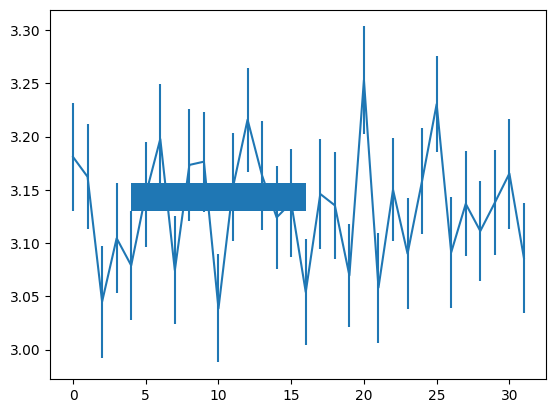

In [16]:
def getPlotData(pdata, fidx):
    idx = [ i for i in range(len(pdata[0])) if pdata[0][i][0] == float(fidx) ]
    return ( [ pdata[0][i][1] for i in idx ], pdata[1][idx], pdata[2][idx] )

plot_data_0 = getPlotData(plot_data,0)
plot_result_0 = getPlotData(plot_result,0)

pyplot.errorbar(plot_data_0[0],plot_data_0[1],yerr=plot_data_0[2])
pyplot.fill_between(plot_result_0[0],plot_result_0[1]-plot_result_0[2],plot_result_0[1]+plot_result_0[2])

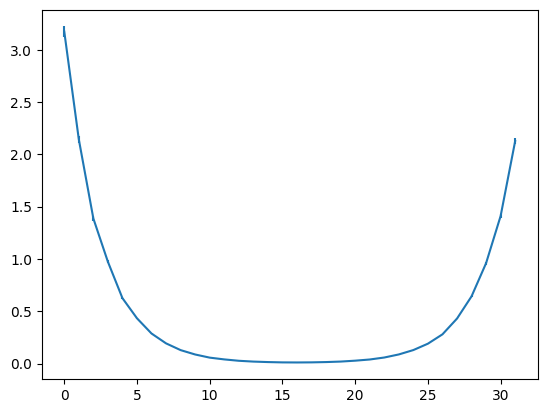

In [17]:
plot_data_1 = getPlotData(plot_data,1)
plot_result_1 = getPlotData(plot_result,1)

pyplot.errorbar(plot_data_1[0],plot_data_1[1],yerr=plot_data_1[2])
pyplot.fill_between(plot_result_1[0],plot_result_1[1]-plot_result_1[2],plot_result_1[1]+plot_result_1[2])